## 랜덤 포레스트 (Random Forest)

### 1. 개요
- **결정 트리(Decision Tree)** 의 단점을 보완하기 위해 개발된 **앙상블(Ensemble)** 학습 기법  
- 여러 개의 **단순한 결정 트리**를 무작위로 만들어,  
  각각의 예측 결과를 **평균(회귀)** 또는 **다수결(분류)** 방식으로 종합하여 최종 결과를 도출한다.
- 즉, **“하나의 트리보다 여러 트리의 집단 지성(대중의 지혜)”** 으로 더 안정적인 성능을 얻는다.

---

### 2. 핵심 아이디어
- 하나의 결정 트리 대신, **수십~수백 개의 트리**를 생성하여 결과를 종합한다.
- 각 트리는 서로 다른 데이터를 사용해 학습되며, 예측 시 모든 트리의 출력을 결합한다.

> 예측 방식  
> - **분류(Classification):** 다수결 투표(Majority Voting)  
> - **회귀(Regression):** 평균(Averaging)

---

### 3. 데이터 랜덤성 (Randomness)
- 트리마다 학습에 사용되는 데이터와 특성을 무작위로 선택한다.
  - **샘플(Random Sampling)**: 훈련 데이터 중 일부를 무작위로 선택 (부트스트래핑, Bootstrap)
  - **특성(Random Feature Selection)**: 트리마다 사용할 특성(feature)의 일부만 랜덤하게 선택
- 이러한 랜덤성 덕분에 트리 간 다양성이 확보되어 **과적합(Overfitting)** 을 줄일 수 있다.

---

### 4. 앙상블 방식 이해 (비유 예시)
- **단일 모델 방식:** 모든 데이터를 한 번에 사용해 하나의 트리만 생성  
- **앙상블 방식:** 데이터를 여러 번 무작위로 나누어 여러 트리를 학습시키고, 그 결과를 종합  

#### 예시 1) “한 사람의 평판 평가”
- 1,000명에게 한 번에 물어보는 대신,  
  50명씩 무작위로 여러 그룹을 만들어 각각 평가 → 평균을 내면 더 안정적인 결과

#### 예시 2) “건강 진단”
- 한 명의 의사보다 100명의 의사가 각각 일부 정보로 진단한 결과를 평균 → 더 신뢰도 높은 판단

---

### 5. 특징
- **다수의 결정 트리 결과를 종합**하므로 단일 트리보다 **안정적이고 일반화 성능이 높음**  
- 학습 과정에서 **데이터 샘플과 특성을 모두 랜덤하게 선택**  
- 개별 트리는 약간의 오류를 포함해도, 전체 평균 결과는 안정적임  
- **큰 수의 법칙(Law of Large Numbers)** 또는 **대중의 지혜(Wisdom of Crowds)** 로 설명 가능

---

### 6. 장점
- 과적합(overfitting)에 강함  
- 이상치나 노이즈에 덜 민감  
- 다양한 데이터에 적용 가능 (분류, 회귀 모두 가능)  
- 하이퍼파라미터 기본값으로도 안정적인 성능  

---

### 7. 단점
- 개별 트리의 동작을 해석하기 어려움 (모델 해석력 ↓)  
- 트리 개수가 많아질수록 계산량이 커짐  
- 실시간 예측이 필요한 경우엔 비효율적일 수 있음

---

### 8. 주요 하이퍼파라미터 (Scikit-learn)
| 파라미터 | 설명 |
|:--|:--|
| `n_estimators` | 생성할 트리의 개수 |
| `max_depth` | 각 트리의 최대 깊이 |
| `max_features` | 각 트리에서 사용할 특성의 수 |
| `bootstrap` | 데이터 샘플링 시 중복 허용 여부 |
| `random_state` | 난수 시드값 (재현성 확보용) |

---

### 9. 예시 코드
```python
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=100,     # 트리 개수
    max_depth=None,       # 최대 깊이 제한 없음
    random_state=42
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

### **랜덤 포레스트(RandomForest)**

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [3]:
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

### **랜덤 포레스트 모델 생성, 학습, 성능 테스트**

In [4]:
np.random.seed(9)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)
rfc = RandomForestClassifier(n_estimators=500)
rfc.fit(X_train, y_train)
print(rfc.score(X_test, y_test))

0.951048951048951


In [5]:
df = pd.DataFrame({'feature': cancer.feature_names,
                   'importance':rfc.feature_importances_})
df = df.sort_values('importance', ascending=False)

x = df.feature
y = df.importance
ypos = np.arange(len(x))

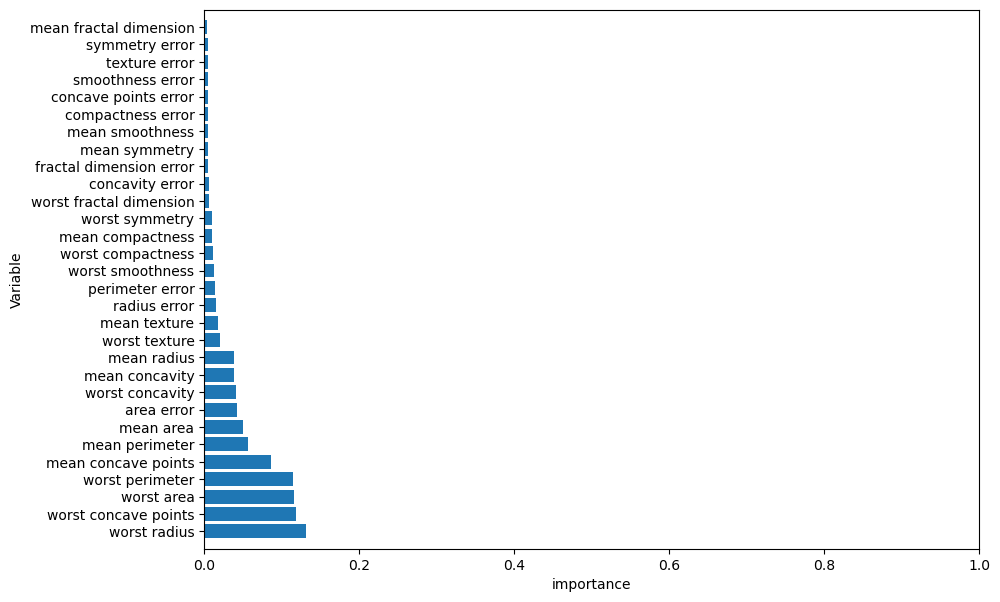

In [6]:
plt.figure(figsize=(10,7))
plt.barh(x, y)
plt.yticks(ypos, x)
plt.xlabel('importance')
plt.ylabel('Variable')
plt.xlim(0,1)
plt.ylim(-1, len(x))
plt.show()

## 직접 투표(Hard Voting)와 간접 투표(Soft Voting)

### 1. 직접 투표 (Hard Voting)
- 각 개별 모델(서브 모델)이 예측한 최종 **클래스(class)** 에 **동등한 1표**를 부여  
- 전체 모델 중 **가장 많은 표를 얻은 클래스**를 최종 결과로 선택  
- 각 모델의 신뢰도(확률)는 고려하지 않음  

**예시**
- 모델 A → Class 1  
- 모델 B → Class 1  
- 모델 C → Class 2  
→ 최종 예측 = **Class 1 (다수결)**

**적용 사례**
- 분류(Classification) 문제에서 사용  
- 예측 결과가 단일 클래스 형태일 때 유용

---

### 2. 간접 투표 (Soft Voting)
- 각 모델이 예측한 클래스에 대한 **확률(probability)** 을 기반으로 종합  
- 모든 모델이 제공한 확률을 평균하거나 합산하여  
  **가장 높은 확률을 가진 클래스**를 최종 결과로 선택  

**예시**
| 모델 | Class 1 확률 | Class 2 확률 |
|:--:|:--:|:--:|
| A | 0.7 | 0.3 |
| B | 0.6 | 0.4 |
| C | 0.4 | 0.6 |

- Class 1 평균 확률 = (0.7 + 0.6 + 0.4) / 3 = 0.566  
- Class 2 평균 확률 = (0.3 + 0.4 + 0.6) / 3 = 0.433  
→ 최종 예측 = **Class 1**

**회귀(Regression)** 의 경우  
- 각 모델이 예측한 **수치 값의 평균**을 최종 결과로 사용함.

---

### 3. 어떤 방식이 더 좋은가?
- 문제의 성격과 데이터에 따라 다르며, 일반적으로:
  - **Hard Voting** → 단순하지만 확률 정보가 없는 모델에 적합  
  - **Soft Voting** → 모델이 클래스 확률을 제공할 수 있을 때 더 안정적

> 대부분의 경우 Soft Voting이 성능이 더 우수하다고 알려져 있음.

---

### 4. Scikit-learn 예시 코드

```python
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# 개별 모델 정의
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()
clf3 = SVC(probability=True)

# Hard Voting
hard_voting = VotingClassifier(
    estimators=[('lr', clf1), ('dt', clf2), ('svc', clf3)],
    voting='hard'
)

# Soft Voting
soft_voting = VotingClassifier(
    estimators=[('lr', clf1), ('dt', clf2), ('svc', clf3)],
    voting='soft'
)
